In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Filling missing value with 'None':

In [4]:
df_test = pd.read_csv('./data/test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
def prepare_clean_data(df):
  df = df.drop_duplicates()

  # BsmtCond
  df['BsmtCond'] = df['BsmtCond'].fillna('NA')
  df['BsmtCond'].unique()

  # LotFrontage
  median_frontage = df['LotFrontage'].median()
  df['LotFrontage'] = df['LotFrontage'].fillna(median_frontage)

  masVnrArea_mean = df['MasVnrArea'].mean()
  df['MasVnrArea'] = df['MasVnrArea'].fillna(masVnrArea_mean)

  garageYrBlt_mean = df['GarageYrBlt'].mean()
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(garageYrBlt_mean)

  df['MasVnrType'] = df['MasVnrType'].fillna('None')
  df['BsmtQual'] = df['BsmtQual'].fillna('None')
  df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
  df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
  df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
  df['Electrical'] = df['Electrical'].fillna('None')
  df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
  df['GarageType'] = df['GarageType'].fillna('None')
  df['GarageFinish'] = df['GarageFinish'].fillna('None')
  df['GarageQual'] = df['GarageQual'].fillna('None')
  df['GarageCond'] = df['GarageCond'].fillna('None')
  df['PoolQC'] = df['PoolQC'].fillna('None')
  df['Fence'] = df['Fence'].fillna('None')
  df['MiscFeature'] = df['MiscFeature'].fillna('None')
  df['Alley'] = df['Alley'].fillna('None')

  categorical_cols_to_encode = [
        'Street', 'Alley', 'BsmtCond', 'MasVnrType',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
        'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
        'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
        'SaleType', 'SaleCondition'
  ]

  df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

  return df

In [8]:
df_cleaned = prepare_clean_data(df)

In [9]:
print(len(df_test))

1459


In [10]:
# print(df['GarageYrBlt'].info())

In [11]:
df_cleaned.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Street_Pave,Alley_None,Alley_Pave,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLa

In [12]:
df_cleaned.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 262 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Id                     1460 non-null   int64  
 1    MSSubClass             1460 non-null   int64  
 2    LotFrontage            1460 non-null   float64
 3    LotArea                1460 non-null   int64  
 4    OverallQual            1460 non-null   int64  
 5    OverallCond            1460 non-null   int64  
 6    YearBuilt              1460 non-null   int64  
 7    YearRemodAdd           1460 non-null   int64  
 8    MasVnrArea             1460 non-null   float64
 9    BsmtFinSF1             1460 non-null   int64  
 10   BsmtFinSF2             1460 non-null   int64  
 11   BsmtUnfSF              1460 non-null   int64  
 12   TotalBsmtSF            1460 non-null   int64  
 13   1stFlrSF               1460 non-null   int64  
 14   2ndFlrSF               1460 non-null  

numeric_df = df_cleaned.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 24))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Display the correlation value on each cell
    fmt=".2f",               # Format the numbers to two decimal places
    cmap='coolwarm',         # Color palette: 'cool' for positive, 'warm' for negative
    linewidths=.5,           # Lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Heatmap of Top Feature Correlations with SalePrice')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# sns.pairplot(df)

In [13]:
numeric_df = df_cleaned.select_dtypes(include=['number', 'bool'])
sale_price_corr = numeric_df.corr()['SalePrice'].copy()

top_correlations = sale_price_corr.abs().sort_values(ascending=False)

print("--- Features Sorted by Individual Correlation Strength with SalePrice ---")
print(top_correlations.drop('SalePrice'))

--- Features Sorted by Individual Correlation Strength with SalePrice ---
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
ExterQual_TA             0.589044
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
KitchenQual_TA           0.519298
YearRemodAdd             0.507101
Foundation_PConc         0.497734
MasVnrArea               0.475241
FireplaceQu_None         0.471908
GarageYrBlt              0.470177
Fireplaces               0.466929
ExterQual_Gd             0.452466
BsmtQual_TA              0.452394
BsmtFinType1_GLQ         0.434597
GarageFinish_Unf         0.410608
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
MasVnrType_None          0.367456
SaleType_New             0.357509
GarageType_Detchd        0.354141
SaleCondition_Partial    0.352060
Foundati

# Drop Week Features

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

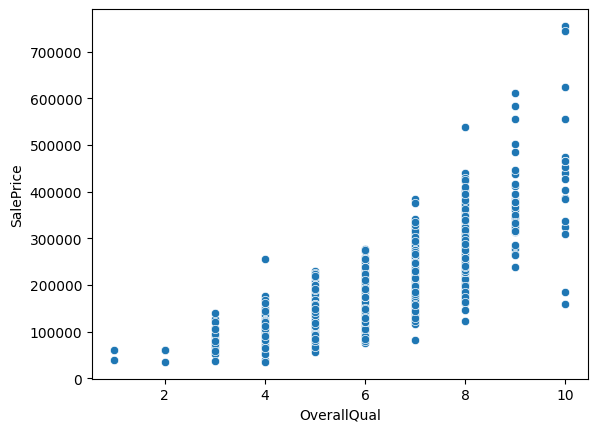

In [14]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

In [15]:
sale_price_corr = top_correlations.drop('SalePrice')

def get_corr_list(series, threshold):
    """Filters the correlation series by an absolute threshold and returns a list of column names."""
    return series[series >= threshold].index.tolist()

strong_corr_list = get_corr_list(sale_price_corr, 0.15)
moderate_corr_list = get_corr_list(sale_price_corr, 0.40)
weak_corr_list = get_corr_list(sale_price_corr, 0.00)

print(f'Strong Correlation List: {strong_corr_list}')
print(f'Moderate Correlation List: {moderate_corr_list}')
print(f'Weak Correlation List: {weak_corr_list}')

Strong Correlation List: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'FireplaceQu_None', 'GarageYrBlt', 'Fireplaces', 'ExterQual_Gd', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'GarageFinish_Unf', 'Neighborhood_NridgHt', 'BsmtFinSF1', 'MasVnrType_None', 'SaleType_New', 'GarageType_Detchd', 'SaleCondition_Partial', 'Foundation_CBlock', 'FireplaceQu_Gd', 'GarageType_Attchd', 'LotFrontage', 'MasVnrType_Stone', 'Neighborhood_NoRidge', 'WoodDeckSF', 'KitchenQual_Gd', '2ndFlrSF', 'OpenPorchSF', 'HeatingQC_TA', 'BsmtExposure_Gd', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'MSZoning_RM', 'HalfBath', 'GarageCond_TA', 'LotShape_Reg', 'LotArea', 'BsmtExposure_No', 'CentralAir_Y', 'GarageQual_TA', 'MSZoning_RL', 'HouseStyle_2Story', 'SaleType_WD', 'Electrical_SBrkr', 'GarageCond_None', 'GarageQual_None', 'GarageFinish_None', 'GarageType_Non

In [ ]:
df_cleaned[strong_corr_list].head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,Foundation_PConc,MasVnrArea,FireplaceQu_None,GarageYrBlt,Fireplaces,ExterQual_Gd,BsmtQual_TA,BsmtFinType1_GLQ,GarageFinish_Unf,Neighborhood_NridgHt,BsmtFinSF1,MasVnrType_None,SaleType_New,GarageType_Detchd,SaleCondition_Partial,Foundation_CBlock,FireplaceQu_Gd,GarageType_Attchd,LotFrontage,MasVnrType_Stone,Neighborhood_NoRidge,WoodDeckSF,KitchenQual_Gd,2ndFlrSF,OpenPorchSF,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,MSZoning_RM,HalfBath,GarageCond_TA,LotShape_Reg,LotArea,BsmtExposure_No,CentralAir_Y,GarageQual_TA,MSZoning_RL,HouseStyle_2Story,SaleType_WD,Electrical_SBrkr,GarageCond_None,GarageQual_None,GarageFinish_None,GarageType_None,RoofStyle_Hip,GarageType_BuiltIn,BsmtQual_Gd,PavedDrive_Y,BsmtFullBath,RoofStyle_Gable,Neighborhood_StoneBr,BsmtUnfSF,MasVnrType_BrkFace,Neighborhood_OldTown,Neighborhood_NAmes,Neighborhood_Edwards,Fence_None,GarageFinish_RFn,RoofMatl_WdShngl,BedroomAbvGr,Exterior1st_MetalSd,Neighborhood_IDOTRR,FireplaceQu_TA,Exterior2nd_MetalSd,Exterior2nd_Wd Sdng,Exterior1st_Wd Sdng,KitchenQual_Fa,SaleCondition_Normal,BsmtQual_None,BsmtCond_NA,BsmtFinType1_None,BsmtExposure_None
0,7,1710,2,548,856,856,False,2,8,2003,False,2003,True,196.0,True,2003.0,0,True,False,True,False,False,706,False,False,False,False,False,False,True,65.0,False,False,0,True,854,61,False,False,True,True,False,1,True,True,8450,True,True,True,True,True,True,True,False,False,False,False,False,False,True,True,1,True,False,150,True,False,False,False,True,True,False,3,False,False,False,False,False,False,False,True,False,False,False,False
1,6,1262,2,460,1262,1262,True,2,6,1976,True,1976,False,0.0,False,1976.0,1,False,False,False,False,False,978,True,False,False,False,True,False,True,80.0,False,False,298,False,0,0,False,True,False,False,False,0,True,True,9600,False,True,True,True,False,True,True,False,False,False,False,False,False,True,True,0,True,False,284,False,False,False,False,True,True,False,3,True,False,True,True,False,False,False,True,False,False,False,False
2,7,1786,2,608,920,920,False,2,6,2001,False,2002,True,162.0,False,2001.0,1,True,False,True,False,False,486,False,False,False,False,False,False,True,68.0,False,False,0,True,866,42,False,False,True,True,False,1,True,False,11250,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True,1,True,False,434,True,False,False,False,True,True,False,3,False,False,True,False,False,False,False,True,False,False,False,False
3,7,1717,3,642,756,961,True,1,7,1915,False,1970,False,0.0,False,1998.0,1,False,True,False,True,False,216,True,False,True,False,False,True,False,60.0,False,False,0,True,756,35,False,False,False,False,False,0,True,False,9550,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,1,True,False,540,False,False,False,False,True,False,False,3,False,False,False,False,False,True,False,False,False,False,False,False
4,8,2198,3,836,1145,1145,False,2,9,2000,False,2000,True,350.0,False,2000.0,1,True,False,True,False,False,655,False,False,False,False,False,False,True,84.0,False,True,192,True,1053,84,False,False,True,True,False,1,True,False,14260,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True,1,True,False,490,True,False,False,False,True,True,False,4,False,False,True,False,False,False,False,True,False,False,False,False


In [17]:
df_test_cleaned = prepare_clean_data(df_test)
df_test_cleaned = df_test_cleaned.fillna(0)
print(len(df_test_cleaned))

1459


In [18]:
df_test_cleaned.sample(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Pave,Alley_None,Alley_Pave,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
870,2331,60,100.0,12191,8,5,1997,1998,515.0,1181.0,0.0,598.0,1779.0,1779,772,0,2551,1.0,0.0,2,1,4,1,8,2,1998.0,3.0,925.0,76,61,0,0,0,0,0,6,2007,True,True,False,False,False,False,True,True,False,False,False,True,False,False

# LinearRegression

In [19]:
# --- Train/validation split & evaluation (your existing code) ---

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[strong_corr_list]
y = df_cleaned[["SalePrice"]]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train_val, y_train_val)

y_pred_val = model.predict(X_test_val)

val_mse = mean_squared_error(y_test_val, y_pred_val)
val_r2 = r2_score(y_test_val, y_pred_val)

print(f"Validation R-squared: {val_r2:.4f}")
print(f"Validation MSE: {val_mse:.2f}")

df_test_cleaned = prepare_clean_data(df_test)
df_test_cleaned = df_test_cleaned.dropna()

X_test_final = df_test_cleaned[strong_corr_list]

test_predictions = model.predict(X_test_final)

df_test_cleaned["SalePrice_Pred"] = test_predictions

print(df_test_cleaned[["SalePrice_Pred"]].head())

submission = pd.DataFrame({
    "Id": df_test_cleaned["Id"],
    "SalePrice": test_predictions.flatten()
})

submission.to_csv("submission.csv", index=False)
print(len(submission))

Validation R-squared: 0.8805
Validation MSE: 916537047.23
   SalePrice_Pred
0   114171.315289
1   152410.356792
2   172713.370865
3   188008.909999
4   227112.402236
1456


# Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# --- Prepare train data ---
X = df_cleaned[strong_corr_list]
y = df_cleaned["SalePrice"]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Build Pipeline ---
model = Pipeline([
    ("forest", RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# --- Train ---
model.fit(X_train_val, y_train_val)

# --- Validate ---
y_pred_val = model.predict(X_test_val)

val_mse = mean_squared_error(y_test_val, y_pred_val)
val_r2 = r2_score(y_test_val, y_pred_val)

print(f"Validation R-squared: {val_r2:.4f}")
print(f"Validation MSE: {val_mse:.2f}")

X_test_final = df_test_cleaned[strong_corr_list]

# --- Predict on test ---
test_predictions = model.predict(X_test_final)

df_test_cleaned["SalePrice_Pred"] = test_predictions
print(df_test_cleaned[["SalePrice_Pred"]].head())

# --- Submission file ---
submission = pd.DataFrame({
    "Id": df_test_cleaned["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)

print(len(submission))
print(len(df_test_cleaned))
print(len(df_test_cleaned))

Validation R-squared: 0.8964
Validation MSE: 794549566.40
   SalePrice_Pred
0        131761.0
1        155847.5
2        179403.5
3        188962.5
4        202733.9
1456
1456
1456


# Gradient Boosting

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

X = df_cleaned[strong_corr_list]
y = df_cleaned["SalePrice"]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Pipeline with Gradient Boosting ---
model = Pipeline([
    ("gboost", GradientBoostingRegressor(
        n_estimators=1500,
        learning_rate=0.01,
        max_depth=4,
        random_state=42
    ))
])

model.fit(X_train_val, y_train_val)

y_pred_val = model.predict(X_test_val)

val_mse = mean_squared_error(y_test_val, y_pred_val)
val_r2 = r2_score(y_test_val, y_pred_val)

print(f"Validation R-squared: {val_r2:.4f}")
print(f"Validation MSE: {val_mse:.2f}")

X_test_final = df_test_cleaned[strong_corr_list]

test_predictions = model.predict(X_test_final)

df_test_cleaned["SalePrice_Pred"] = test_predictions
print(df_test_cleaned[["SalePrice_Pred"]].head())

submission = pd.DataFrame({
    "Id": df_test_cleaned["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)
print(len(submission))

Validation R-squared: 0.9135
Validation MSE: 663501359.90
   SalePrice_Pred
0   127670.832028
1   160874.243092
2   182875.264551
3   193835.887061
4   188518.895114
1456


# XGBRegressor

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[strong_corr_list]
y = df_cleaned["SalePrice"]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("xgb", XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.001,
    reg_lambda=1.0,
    random_state=42,
    tree_method="hist"
))
])

model.fit(X_train_val, y_train_val)

preds = model.predict(X_test_val)
print("R2:", r2_score(y_test_val, preds))
print("MSE:", mean_squared_error(y_test_val, preds))


# LGBMRegressor

from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[strong_corr_list]
y = df_cleaned["SalePrice"]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("xgb", LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=50,
    subsample=0.7,
    subsample_freq=1,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
))
])

model.fit(X_train_val, y_train_val)

preds = model.predict(X_test_val)
print("R2:", r2_score(y_test_val, preds))
print("MSE:", mean_squared_error(y_test_val, preds))


 # CatBootRegressor

# !pip install catboost

from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[strong_corr_list]
y = df_cleaned["SalePrice"]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("xgb", CatBoostRegressor(
    iterations=15000,
    learning_rate=0.03,
    depth=3,
    l2_leaf_reg=3,
    loss_function="RMSE",
    random_seed=42,
    verbose=False,
    bagging_temperature=1.0
))
])

model.fit(X_train_val, y_train_val)

preds = model.predict(X_test_val)
print("R2:", r2_score(y_test_val, preds))
print("MSE:", mean_squared_error(y_test_val, preds))
